**Datascience Task-2 (Stock Market)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


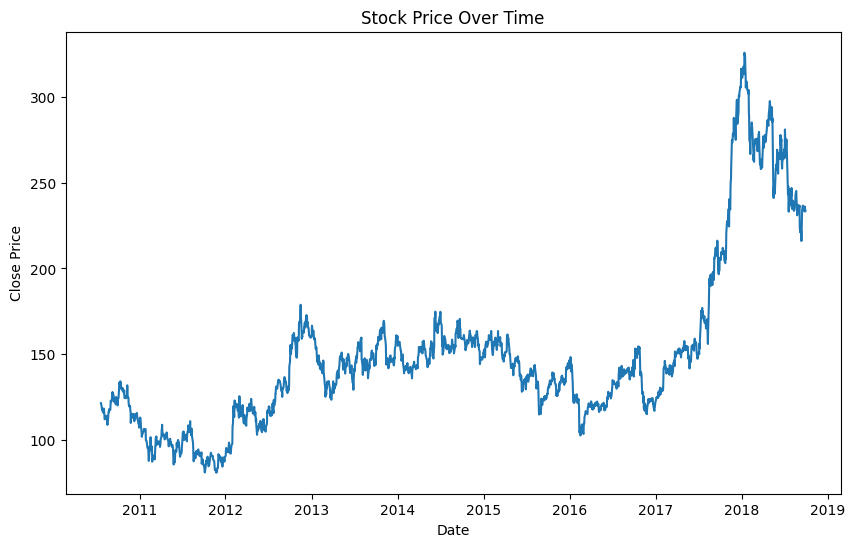

In [ ]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [ ]:
# Filter the close price
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [ ]:
# Define the length of sequences
sequence_length = 60

# Create the dataset for training
def create_dataset(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Split the data into training and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - sequence_length:]

X_train, y_train = create_dataset(train_data, sequence_length)
X_test, y_test = create_dataset(test_data, sequence_length)


In [ ]:
# Build the model
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add the second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the third LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
40/40 [==============================] - 10s 120ms/step - loss: 0.0062 - val_loss: 0.0011
Epoch 2/100
40/40 [==============================] - 4s 92ms/step - loss: 0.0015 - val_loss: 8.7609e-04
Epoch 3/100
40/40 [==============================] - 3s 73ms/step - loss: 0.0012 - val_loss: 8.5062e-04
Epoch 4/100
40/40 [==============================] - 3s 73ms/step - loss: 0.0011 - val_loss: 8.4120e-04
Epoch 5/100
40/40 [==============================] - 3s 81ms/step - loss: 0.0012 - val_loss: 7.4009e-04
Epoch 6/100
40/40 [==============================] - 5s 123ms/step - loss: 0.0012 - val_loss: 9.4986e-04
Epoch 7/100
40/40 [==============================] - 3s 73ms/step - loss: 0.0011 - val_loss: 7.3428e-04
Epoch 8/100
40/40 [==============================] - 3s 73ms/step - loss: 9.7847e-04 - val_loss: 6.8135e-04
Epoch 9/100
40/40 [==============================] - 3s 85ms/step - loss: 9.5091e-04 - val_loss: 7.8162e-04
Epoch 10/100
40/40 [==============================] - 4s 

13/13 [==============================] - 2s 37ms/step


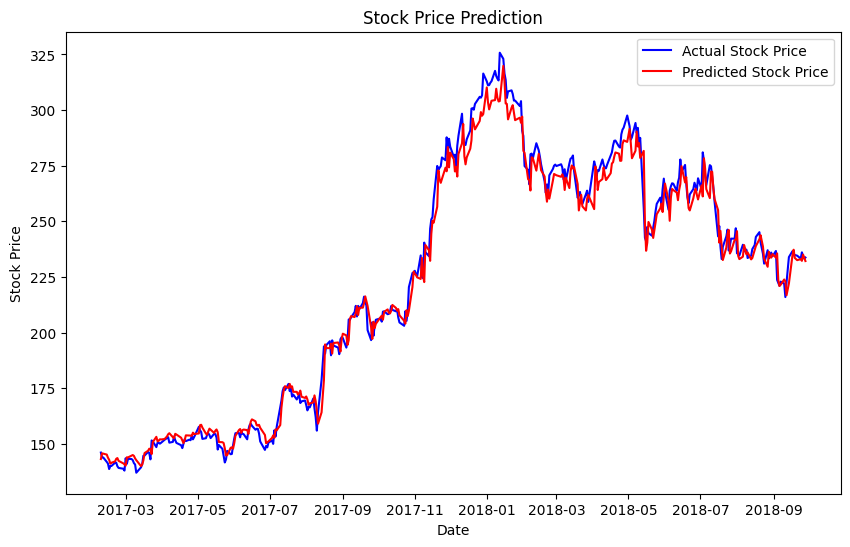

In [ ]:
# Predicting the stock prices
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][train_size:], scaler.inverse_transform(scaled_data[train_size:]), color='blue', label='Actual Stock Price')
plt.plot(df['Date'][train_size:], predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
model.save('stock_price_lstm_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
